## Analyse Bloomberg 2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Simple data pre-processing

In [ ]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("/content/drive/MyDrive/LLMs + VDBs for ESG/Misc/Francois hu/Bloomberg_2022_esg_data.csv")
print("(rows, columns):\t\t\t", raw_data.shape)

unique_companies = np.unique(raw_data["companyname"])
print("How many companies (unique names)?\t", len(unique_companies))

(rows, columns):			 (6200, 57)
How many companies (unique names)?	 452


**However, many redundancy...**

In [ ]:
from pprint import pprint

pprint(list(unique_companies[100:120]))

['Cholamandalam Investment and Finance Company Limited',
 'Cholamandalam Investment and Finance Company Limited, Asset Management Arm',
 'City Developments Limited',
 'Civitas Social Housing PLC',
 'Clientele Limited, Asset Management Arm',
 'Clientèle Limited',
 'Cofinimmo SA',
 'Comdirect Bank AG, Asset Management Arm',
 'Countryside Partnerships PLC',
 'Cromwell European Real Estate Investment Trust',
 'Cyrela Brazil Realty S.A. Empreendimentos e Participações',
 'D.M. Wenceslao & Associates, Incorporated',
 'DCB Bank Limited',
 'DCB Bank Limited, Asset Management Arm',
 'DGB Financial Group Co Ltd, Asset Management Arm',
 'DGB Financial Group Co., Ltd.',
 'DSC Investment Inc.',
 'Dah Sing Banking Group Limited',
 'Dah Sing Banking Group Ltd., Asset Management Arm',
 'Daibiru Corporation']


**Need to be pre-processed...**

**A simple regex first...**

- we remove all strings after `Inc.|Inc|SA|S.A.|Limited|Company|Group|,|(|Co.|Ltd.|`
- remove all parenthesis and their content
- all in lowercase
- all in unicode

In [ ]:
!pip install Unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
import re
from unidecode import unidecode

def stop_before_co_ltd(input_string):
    # Remove parentheses and their contents
    input_string = re.sub(r'\([^)]*\)', '', input_string)

    match = re.search(r'(.+?)(Inc.|Inc|PLC|plc|SA|S.A.|Limited|Company|Group|,|Co.|Ltd.|$)', input_string)
    if match:
        string = unidecode(match.group(1).strip().lower())
        string_split = string.split()
        # Define a regex pattern to match strings containing "."
        pattern = re.compile(r'^[^.]*$')
        # Filter strings using list comprehension
        filtered_strings = [s for s in string_split if pattern.match(s)]
        return ' '.join(filtered_strings)
    else:
        string = unidecode(input_string.lower())
        string_split = string.split()
        # Define a regex pattern to match strings containing "."
        pattern = re.compile(r'^[^.]*$')
        # Filter strings using list comprehension
        filtered_strings = [s for s in string_split if pattern.match(s)]
        return ' '.join(filtered_strings)

# Example usage:
#company_names = ["ABC Inc. Co", "ABCD Ltd. XYZ", "XYZ Corp.", "XYZ Limited", "PQR Co."]
companies_prepro = [stop_before_co_ltd(name) for name in unique_companies]
unique_companies_prepro = np.unique(companies_prepro)
# Print the result
#for original, modified in zip(unique_companies, unique_companies_prepro):
#    print(f"Original: {original},\t \nModified: {modified}")

print(f"We have {len(np.unique(companies_prepro))} companies after (naive) preprocessing...")

We have 354 companies after (naive) preprocessing...


In [ ]:
from pprint import pprint

pprint(unique_companies[100:120])

array(['Cholamandalam Investment and Finance Company Limited',
       'Cholamandalam Investment and Finance Company Limited, Asset Management Arm',
       'City Developments Limited', 'Civitas Social Housing PLC',
       'Clientele Limited, Asset Management Arm', 'Clientèle Limited',
       'Cofinimmo SA', 'Comdirect Bank AG, Asset Management Arm',
       'Countryside Partnerships PLC',
       'Cromwell European Real Estate Investment Trust',
       'Cyrela Brazil Realty S.A. Empreendimentos e Participações',
       'D.M. Wenceslao & Associates, Incorporated', 'DCB Bank Limited',
       'DCB Bank Limited, Asset Management Arm',
       'DGB Financial Group Co Ltd, Asset Management Arm',
       'DGB Financial Group Co., Ltd.', 'DSC Investment Inc.',
       'Dah Sing Banking Group Limited',
       'Dah Sing Banking Group Ltd., Asset Management Arm',
       'Daibiru Corporation'], dtype=object)


In [ ]:
from pprint import pprint

pprint(companies_prepro[100:120])

['cholamandalam investment and finance',
 'cholamandalam investment and finance',
 'city developments',
 'civitas social housing',
 'clientele',
 'clientele',
 'cofinimmo',
 'comdirect bank ag',
 'countryside partnerships',
 'cromwell european real estate investment trust',
 'cyrela brazil realty',
 'wenceslao & associates',
 'dcb bank',
 'dcb bank',
 'dgb financial',
 'dgb financial',
 'dsc investment',
 'dah sing banking',
 'dah sing banking',
 'daibiru']


In [ ]:
pprint(list(unique_companies_prepro)[:20])

['360 one wam',
 'a j bell holdings',
 'abn amro',
 'abn amro bank',
 'about you holding ag',
 'abrdn',
 'accelink technologies',
 'aeon thana sinsap public',
 'ageas',
 'aguas andinas',
 'aia',
 'airport facilities',
 'aj bell',
 'aju capital',
 'akbank',
 'al salam bank',
 'al-salam bank - bahrain',
 'altarea sca',
 'altshuler shaham provident funds and pension ltd',
 'anadolu hayat emeklilik']


In [ ]:
# we add a new column
raw_data["companyname_prepro"] = [stop_before_co_ltd(name) for name in raw_data["companyname"]]

In [ ]:
raw_data[["companyname", "companyname_prepro"]]

,companyname,companyname_prepro
0,Daiwa Securities Group Inc.,daiwa securities
1,Daiwa Securities Group Inc.,daiwa securities
2,Daiwa Securities Group Inc.,daiwa securities
3,Daiwa Securities Group Inc.,daiwa securities
4,Daiwa Securities Group Inc.,daiwa securities
...,...,...
6195,PEXA Group Limited,pexa
6196,PEXA Group Limited,pexa
6197,PEXA Group Limited,pexa
6198,PEXA Group Limited,pexa


In [ ]:
data_with_companies = raw_data.drop('companyname', axis=1)

**After some additional preprocessing, taking `institutionid` into account...**

In [ ]:
unique_values = data_with_companies.groupby('institutionid')['companyname_prepro'].unique()

for idx, values in unique_values.items():
    if len(values) > 1:
        data_with_companies.loc[data_with_companies["institutionid"] == idx, "companyname_prepro"] = values[0]

**Let us detect and eventually remove all data duplicates**

In [ ]:
# Detect and print duplicate rows based on all columns
duplicates_all = data_with_companies[data_with_companies.duplicated()]
print("Duplicate Rows (all columns):")
print(duplicates_all.shape[0])

## Detect and print duplicate rows based on a specific column
#duplicates_column = raw_data[raw_data.duplicated(subset='Company')]
#print("\nDuplicate Rows (based on 'Company' column):")
#print(duplicates_column)

Duplicate Rows (all columns):
1562


**Remove duplicated rows...**

In [ ]:
# Drop duplicates and keep the first occurrence
data_preprocessed = data_with_companies.drop_duplicates()

print("shape of the preprocessed data:", data_preprocessed.shape)

shape of the preprocessed data: (4638, 57)


In [ ]:
print(len(np.unique(data_with_companies["institutionid"])))
print(len(np.unique(data_preprocessed["institutionid"])))
print(len(np.unique(data_preprocessed["companyname_prepro"])))

324
324
324


**After all preprocessing steps, we have 324 unique companies**

**Let us study the intersection with TPI companies**

In [ ]:
# import tpi companies
tpi_companies = pd.read_csv("Company_Latest_Assessments.csv")

# we add a new column
tpi_companies["companyname_prepro"] = [stop_before_co_ltd(name) for name in tpi_companies["Company Name"]]

print(f"We have {len(np.unique(tpi_companies.companyname_prepro))} TPI companies ...")

FileNotFoundError: [Errno 2] No such file or directory: 'Company_Latest_Assessments.csv'

In [ ]:
from fuzzywuzzy import fuzz
import Levenshtein

In [ ]:
%%time

#def select_first_two_words(input_string):
#    words = input_string.split()
#    first_two_words = ' '.join(words[:2])
#    return first_two_words
#tpi_set = set([ select_first_two_words(name) for name in np.unique(tpi_companies.companyname_prepro)])
#bloomberg_set = set([ select_first_two_words(name) for name in np.unique(data_preprocessed["companyname_prepro"])])
#intersec_set = set.intersection(tpi_set, bloomberg_set)

tpi_list = []
bloomberg_list = []
couple_list = []
for tpi_name in np.unique(tpi_companies["Company Name"]):
    for bloomberg_name in np.unique(data_preprocessed["companyname_prepro"]):
        if fuzz.token_set_ratio(tpi_name, bloomberg_name) > 90:
            tpi_list.append(tpi_name)
            bloomberg_list.append(bloomberg_name)

            couple_list.append([tpi_name, bloomberg_name])


CPU times: user 9.16 s, sys: 42.1 ms, total: 9.2 s
Wall time: 9.22 s


In [ ]:
np.unique(tpi_list)

array(['Aeon', 'Banco Santander', 'EQT', 'Ferrari', 'H.B. Fuller',
       'Hitachi', 'Mahindra&Mahindra', 'Orient Overseas',
       'SITC International Holdings', 'SK',
       'Shanying International Holdings', 'Sumitomo'], dtype='<U31')

In [ ]:
np.unique(bloomberg_list)

array(['aeon thana sinsap public', 'banco santander mexico',
       'banco santander-chile', 'eqt holdings', 'ferrari', 'fuller',
       'hitachi capital', 'mahindra lifespace developers', 'orient',
       'sk bioscience', 'sk securities', 'sumitomo mitsui trust bank',
       'wah international holdings'], dtype='<U29')

In [ ]:
matches_df = pd.DataFrame(couple_list, columns=["TPI names", "Bloomberg names"])
matches_df

,TPI names,Bloomberg names
0,Aeon,aeon thana sinsap public
1,Banco Santander,banco santander mexico
2,Banco Santander,banco santander-chile
3,EQT,eqt holdings
4,Ferrari,ferrari
5,H.B. Fuller,fuller
6,Hitachi,hitachi capital
7,Mahindra&Mahindra,mahindra lifespace developers
8,Orient Overseas,orient
9,SITC International Holdings,wah international holdings


In [ ]:
# which sectors ? todo
# which TPI levels ? todo


In [ ]:
sum(tpi_companies["Company Name"].isin(matches_df["TPI names"]))

12

In [ ]:

select_companies_df = tpi_companies.loc[
    tpi_companies["Company Name"].isin(matches_df["TPI names"]),
    ["Company Name", "Sector", "Level", "Geography"]]

select_companies_df.columns = ['TPI names', 'Sector', "Level", 'Geography']

pd.merge(matches_df, select_companies_df, on='TPI names')
#tpi_companies.Sector

,TPI names,Bloomberg names,Sector,Level,Geography
0,Aeon,aeon thana sinsap public,Consumer Goods,3,Japan
1,Banco Santander,banco santander mexico,Services,4,Spain
2,Banco Santander,banco santander-chile,Services,4,Spain
3,EQT,eqt holdings,Oil & Gas,3,United States of America
4,Ferrari,ferrari,Autos,3,Italy
5,H.B. Fuller,fuller,Chemicals,3,United States of America
6,Hitachi,hitachi capital,Other Industrials,3,Japan
7,Mahindra&Mahindra,mahindra lifespace developers,Autos,4,India
8,Orient Overseas,orient,Shipping,3,Hong Kong
9,SITC International Holdings,wah international holdings,Shipping,3,Hong Kong


### 2. Sample 20 companies at random

**Let us choose randomly 20 companies first ...**

**Q: need to be in canada ?**

In [ ]:

data_preprocessed.loc[data_preprocessed["country"] == "Czech Republic", "country"] = "Czechia"
data_preprocessed.loc[data_preprocessed["country"] == "United States", "country"] = "United States of America"

print(np.unique(data_preprocessed["country"]))

remove_countries = ["Bahrain", "Bahrain", "Guernsey", "Hong Kong", "Isle of Man", "Jersey", "Mauritania", "Singapore"]
# modify : United States of America, Czechia

['Argentina' 'Australia' 'Austria' 'Bahrain' 'Belgium' 'Bermuda' 'Brazil'
 'Chile' 'China' 'Colombia' 'Cyprus' 'Czechia' 'Denmark' 'Egypt' 'France'
 'Germany' 'Ghana' 'Greece' 'Guernsey' 'Hong Kong' 'Hungary' 'India'
 'Indonesia' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jersey' 'Kuwait' 'Lebanon' 'Malaysia' 'Mauritius' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Qatar'
 'Saudi Arabia' 'Singapore' 'South Africa' 'South Korea' 'Sweden'
 'Switzerland' 'Taiwan' 'Thailand' 'Togo' 'Turkey' 'United Arab Emirates'
 'United Kingdom' 'United States of America' 'Vietnam']


In [ ]:
# remove some countries/cities -> not enough information
data_preprocessed = data_preprocessed[~data_preprocessed["country"].isin(remove_countries)]

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset to the default warning settings if needed
#warnings.resetwarnings()

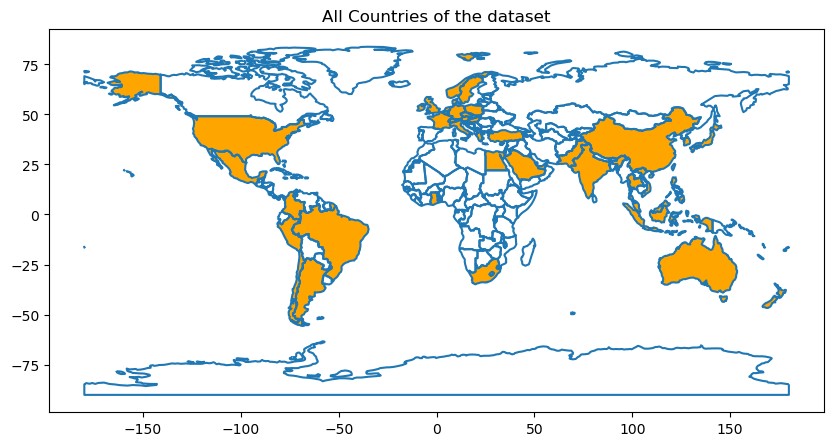

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Example list of countries to be colored in orange
selected_countries = np.unique(data_preprocessed["country"])

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_countries'))

# Filter the GeoDataFrame to include only selected countries
selected_geo_df = world[world['name'].isin(selected_countries)]

# Plot the world map with selected countries in red
fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax)
selected_geo_df.plot(ax=ax, color='orange')
plt.title('All Countries of the dataset')
plt.show()


**Let us choose randomly ...**

In [ ]:
import random

np.random.seed(42)#np.random.seed(42) 0
sampled_companies = np.random.choice(unique_companies_prepro, size=20, replace=False)
sampled_companies

array(['munchener ruckversicherungs-gesellschaft aktiengesellschaft in munchen',
       'banco santander-chile',
       'shenzhen special economic zone real estate & properties',
       'soho china', 'blom bank', 'united bank', 'al salam bank b.s.c.',
       'bookoff', 'pendal', 'ferrari n.v.', 'city developments', 'urbi',
       'mapletree logistics trust', 'sanfeng intelligent equipment',
       'far east hospitality trust', 'fibra shop', 'shizuoka financial',
       'shenzhen yan tian port holdings', 'genolution',
       'zhuhai huafa properties'], dtype='<U70')

**How many rows in the dataset ?**

In [ ]:
sum(data_preprocessed["companyname_prepro"].isin(sampled_companies))

226

In [ ]:
data_sampled = data_preprocessed[data_preprocessed["companyname_prepro"].isin(sampled_companies)]
data_sampled.shape

(226, 57)

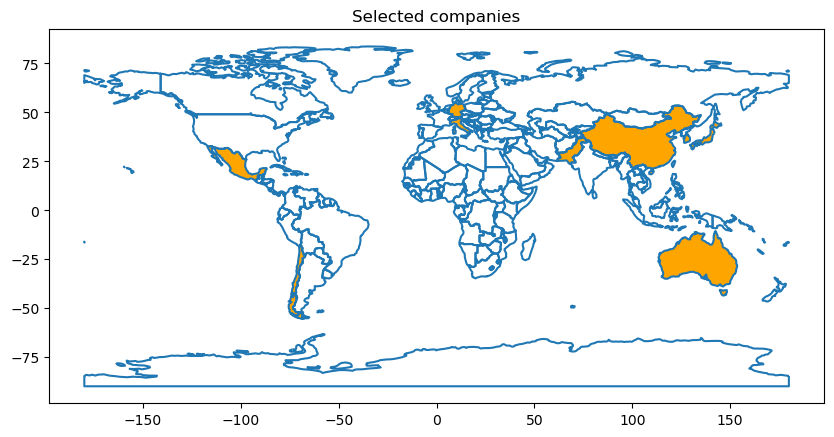

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Example list of countries to be colored in red
selected_countries = np.unique(data_sampled["country"])

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the GeoDataFrame to include only selected countries
selected_geo_df = world[world['name'].isin(selected_countries)]

# Plot the world map with selected countries in red
fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax)
selected_geo_df.plot(ax=ax, color='orange')
plt.title('Selected companies')
plt.show()


### 2 bis. Select other companies

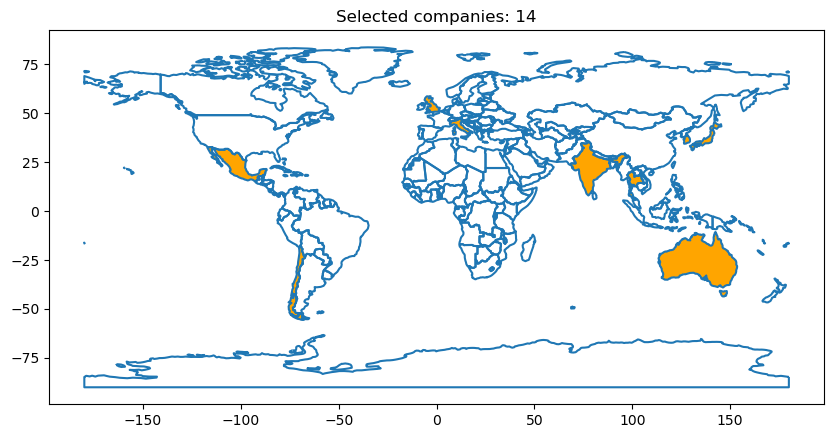

In [ ]:
# WE CAN MANUALLY SELECT WANTED COMPANIES HERE

sampled_companies = list(matches_df["Bloomberg"])

sum(data_preprocessed["companyname_prepro"].isin(sampled_companies))

data_sampled = data_preprocessed[data_preprocessed["companyname_prepro"].isin(sampled_companies)]
data_sampled.shape

import geopandas as gpd
import matplotlib.pyplot as plt

# Example list of countries to be colored in red
selected_countries = np.unique(data_sampled["country"])

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the GeoDataFrame to include only selected countries
selected_geo_df = world[world['name'].isin(selected_countries)]

# Plot the world map with selected countries in red
fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax)
selected_geo_df.plot(ax=ax, color='orange')
plt.title(f'Selected companies: {len(sampled_companies)}')
plt.show()


In [ ]:
# WE CAN MANUALLY SELECT WANTED COMPANIES HERE

#sampled_companies = [
#
#]
#
#sum(data_preprocessed["companyname_prepro"].isin(sampled_companies))
#
#data_sampled = data_preprocessed[data_preprocessed["companyname_prepro"].isin(sampled_companies)]
#data_sampled.shape
#
#import geopandas as gpd
#import matplotlib.pyplot as plt
#
## Example list of countries to be colored in red
#selected_countries = np.unique(data_sampled["country"])
#
## Load world map shapefile
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#
## Filter the GeoDataFrame to include only selected countries
#selected_geo_df = world[world['name'].isin(selected_countries)]
#
## Plot the world map with selected countries in red
#fig, ax = plt.subplots(figsize=(10, 6))
#world.boundary.plot(ax=ax)
#selected_geo_df.plot(ax=ax, color='orange')
#plt.title('Selected companies')
#plt.show()
#

### 3. Simple data visualization

**We select wanted indicators...**

In [ ]:
feature_columns = ["Absolute_GHG_Scope1",
                   "Absolute_GHG_Scope2",
                   #"Scope2_Disclosure",
                    "Absolute_GHG_Scope3_Up",
                    "Absolute_GHG_Scope3_Down",
                    #"di_319404",
                    "Intensity_GHG_Scope1",
                    "Intensity_GHG_Scope2",
                    "Intensity_GHG_Scope3_Down",
                    "Intensity_GHG_Scope3_Up", # ...
                    #"Scope3_Disclosure",
                    "Alignment_Gap_2C",
                    "Alignment_Gap_WB_2C",
                    "Alignment_Gap_4C",
                    "Alignment_Gap_3C",
                    #"WB_2C_Aligned_Intensity_Adjusted_Profit", -> NA
                    #"WB_2C_Aligned_Emissions", -> NA
                    "2C_Aligned_Emissions",
                    "2C_Aligned_Intensity_Adjusted_Profit"
                   ]

financial_columns = ["OPERATING_PROFIT_MARGIN"]
label_columns = ["companyname_prepro"]

In [ ]:
data_reduced = data_sampled[feature_columns + financial_columns + label_columns]

In [ ]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 182 to 6064
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Absolute_GHG_Scope1                   198 non-null    float64
 1   Absolute_GHG_Scope2                   198 non-null    float64
 2   Absolute_GHG_Scope3_Up                198 non-null    float64
 3   Absolute_GHG_Scope3_Down              198 non-null    float64
 4   Intensity_GHG_Scope1                  198 non-null    float64
 5   Intensity_GHG_Scope2                  198 non-null    float64
 6   Intensity_GHG_Scope3_Down             198 non-null    float64
 7   Intensity_GHG_Scope3_Up               198 non-null    float64
 8   Alignment_Gap_2C                      198 non-null    float64
 9   Alignment_Gap_WB_2C                   198 non-null    float64
 10  Alignment_Gap_4C                      198 non-null    float64
 11  Alignment_Gap_3C

In [ ]:

features = data_reduced[feature_columns]
labels = data_reduced[label_columns]


**We display it with a t-SNE visualization (dimensionality reduction for visualizing features)...**

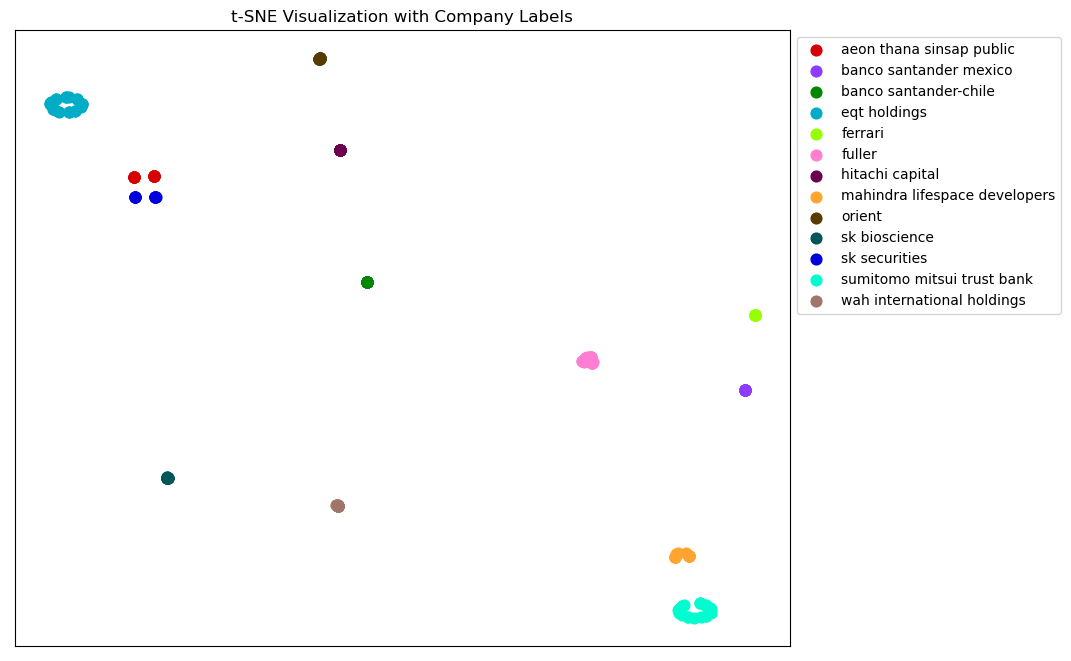

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns

palette = sns.color_palette(cc.glasbey, n_colors=20)
sns.set_palette(palette)

label_encoder = LabelEncoder()
data_reduced['encoded_company'] = label_encoder.fit_transform(data_reduced['companyname_prepro'])
data_reduced['encoded_company'] = data_reduced['encoded_company'].astype('category')

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Create a DataFrame with t-SNE results and labels
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2']).assign(Company=list(data_reduced['companyname_prepro'])) #companyname_prepro, encoded_company

fig, ax = plt.subplots(figsize=(10, 8))

## Plot t-SNE results
groups = pd.DataFrame(tsne_df, columns=['tsne1', 'tsne2', 'Company']).groupby('Company')
for name, points in groups:
    ax.scatter(points.tsne1, points.tsne2, label=name, marker="o", s=60)

ax.set_title('t-SNE Visualization with Company Labels')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticks([])
ax.set_yticks([])

plt.show()


**With associated clusters (Kmeans is used here, with $K=3$ by default)...**

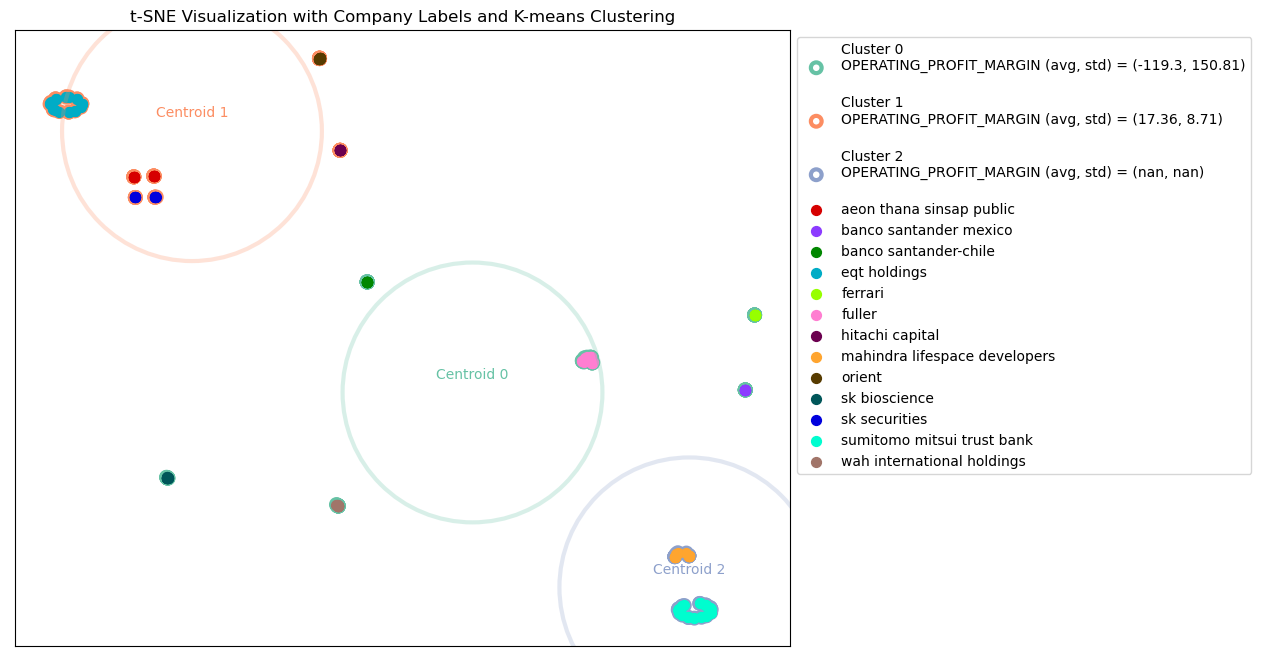

In [ ]:
k = 3
np.random.seed(42)

fig, ax = plt.subplots(figsize=(10, 8))

#colors_kmeans = ['magenta', 'gold', 'cyan']
colors_kmeans = plt.cm.Set2.colors

#kmeans = KMeans(n_clusters=k, random_state=0).fit(tsne_df[["tsne1", "tsne2"]]) # , n_init="auto"

from scipy.spatial.distance import cdist

def kmeans(x, k, no_of_iterations=100):
    idx = np.random.choice(len(x), k, replace=False)
    # Randomly choosing Centroids
    centroids = x[idx, :]
    # finding the distance between centroids and all the data labels
    distances = cdist(x, centroids, 'euclidean')
    labels = np.array([np.argmin(i) for i in distances])

    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[labels == idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)  # Updated Centroids
        distances = cdist(x, centroids, 'euclidean')
        labels = np.array([np.argmin(i) for i in distances])
    return labels, centroids


labels, centroids = kmeans(tsne_df[['tsne1', 'tsne2']].values, k)

for val, color in zip(range(k), colors_kmeans):
    financial_mean_result = round(np.nanmean(data_reduced.loc[labels == val, "OPERATING_PROFIT_MARGIN"]), 2)
    financial_std_result = round(np.nanstd(data_reduced.loc[labels == val, "OPERATING_PROFIT_MARGIN"]), 2)
    plt.scatter(tsne_df[labels == val].tsne1, tsne_df[labels == val].tsne2,
                label=f'Cluster {val}\nOPERATING_PROFIT_MARGIN (avg, std) = ({financial_mean_result}, {financial_std_result})\n',
                s=60, facecolor='none', edgecolor=color, lw=3)

# Plot t-SNE results
groups = pd.DataFrame(tsne_df, columns=['tsne1', 'tsne2', 'Company']).groupby('Company')
for name, points in groups:
    ax.scatter(points.tsne1, points.tsne2, label=name, marker="o", s=50)

# Plot cluster centroids
for val, color in zip(range(k), colors_kmeans):
    plt.scatter(centroids[val, 0], centroids[val, 1], facecolor='none', edgecolor=color, lw=3, s=35000, alpha=0.25)
    ax.annotate(f'Centroid {val}', (centroids[val, 0], centroids[val, 1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color=color)

ax.set_title('t-SNE Visualization with Company Labels and K-means Clustering')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticks([])
ax.set_yticks([])

plt.show()

**With 4 clusters ...**

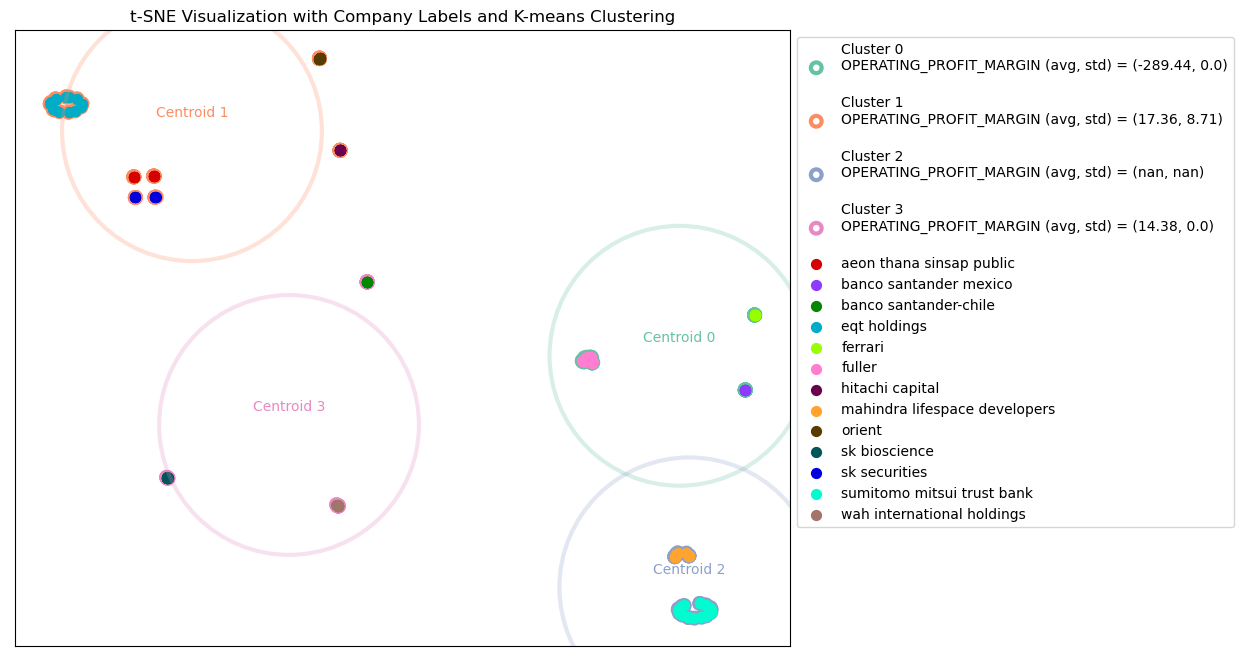

In [ ]:
k = 4
np.random.seed(42)

fig, ax = plt.subplots(figsize=(10, 8))

#colors_kmeans = ['magenta', 'gold', 'cyan']
colors_kmeans = plt.cm.Set2.colors

#kmeans = KMeans(n_clusters=k, random_state=0).fit(tsne_df[["tsne1", "tsne2"]]) # , n_init="auto"

from scipy.spatial.distance import cdist

def kmeans(x, k, no_of_iterations=100):
    idx = np.random.choice(len(x), k, replace=False)
    # Randomly choosing Centroids
    centroids = x[idx, :]
    # finding the distance between centroids and all the data labels
    distances = cdist(x, centroids, 'euclidean')
    labels = np.array([np.argmin(i) for i in distances])

    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[labels == idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)  # Updated Centroids
        distances = cdist(x, centroids, 'euclidean')
        labels = np.array([np.argmin(i) for i in distances])
    return labels, centroids


labels, centroids = kmeans(tsne_df[['tsne1', 'tsne2']].values, k)

for val, color in zip(range(k), colors_kmeans):
    financial_mean_result = round(np.nanmean(data_reduced.loc[labels == val, "OPERATING_PROFIT_MARGIN"]), 2)
    financial_std_result = round(np.nanstd(data_reduced.loc[labels == val, "OPERATING_PROFIT_MARGIN"]), 2)
    plt.scatter(tsne_df[labels == val].tsne1, tsne_df[labels == val].tsne2,
                label=f'Cluster {val}\nOPERATING_PROFIT_MARGIN (avg, std) = ({financial_mean_result}, {financial_std_result})\n',
                s=60, facecolor='none', edgecolor=color, lw=3)

# Plot t-SNE results
groups = pd.DataFrame(tsne_df, columns=['tsne1', 'tsne2', 'Company']).groupby('Company')
for name, points in groups:
    ax.scatter(points.tsne1, points.tsne2, label=name, marker="o", s=50)

# Plot cluster centroids
for val, color in zip(range(k), colors_kmeans):
    plt.scatter(centroids[val, 0], centroids[val, 1], facecolor='none', edgecolor=color, lw=3, s=35000, alpha=0.25)
    ax.annotate(f'Centroid {val}', (centroids[val, 0], centroids[val, 1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color=color)

ax.set_title('t-SNE Visualization with Company Labels and K-means Clustering')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticks([])
ax.set_yticks([])

plt.show()